In [38]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_excel('Test1.xlsx')
df
print(df)

      datetime      open      high       low     close     volumns
0   2019-09-08  10000.00  10412.65  10000.00  10391.63    3096.291
1   2019-09-09  10316.62  10475.54  10077.22  10307.00   14824.373
2   2019-09-10  10307.00  10382.97   9940.87  10102.02    9068.955
3   2019-09-11  10094.27  10293.11   9884.31  10159.55   10897.922
4   2019-09-12  10163.06  10450.13  10042.12  10415.13   15609.634
..         ...       ...       ...       ...       ...         ...
263 2020-05-28   9197.32   9621.65   9110.97   9569.59  327412.374
264 2020-05-29   9569.58   9598.00   9317.42   9422.26  238691.299
265 2020-05-30   9422.11   9753.00   9326.01   9695.00  255234.058
266 2020-05-31   9694.38   9698.00   9371.76   9446.43  219829.356
267 2020-06-01   9446.49  10497.25   9420.85  10232.48  333740.457

[268 rows x 6 columns]


In [39]:
def SMA(data, period=30, column="close"):
    return data[column].rolling(window=period).mean()

def EMA(data, period=20, column="close"):
    return data[column].rolling(window=period).mean()


In [37]:
EMA(df, period=30)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
263    9189.527333
264    9210.796000
265    9246.470667
266    9267.001000
267    9308.911000
Name: close, Length: 268, dtype: float64

In [47]:
###MACD
def MACD(data, period_long=26, period_short=12, period_signal=9, column='close'):

    # 장기지수 이평선 계산
    shortEMA = EMA(data, period_short, column=column)
    # 단기지수 이평선 계산
    longEMA = EMA(data, period_long, column=column)
    
    #이동 평균 수렵/발산계산
    data['MACD'] = shortEMA - longEMA
    
    #신호선 계산
    data['Signal_Line'] = EMA(data, period_signal, column='MACD')
    
    return data

In [41]:
def RSI(data, period = 14, column = 'close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    data['up'] = up
    data['down'] = down
    
    AVG_Gain = SMA(data, period, column='up')
    AVG_Loss = abs(SMA(data, period, column='down'))
    RS = AVG_Gain / AVG_Loss
    
    RSI = 100.0 - (100.0/(1.0+RS))
    data['RSI'] = RSI
    
    return data

In [42]:
RSI(df, period = 14)

,datetime,open,high,low,close,volumns,up,down,RSI
0,2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,NaN,NaN,NaN
1,2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,0.00,-84.63,NaN
2,2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,0.00,-204.98,NaN
3,2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,57.53,0.00,NaN
4,2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,255.58,0.00,NaN
...,...,...,...,...,...,...,...,...,...
263,2020-05-28,9197.32,9621.65,9110.97,9569.59,327412.374,372.27,0.00,46.616129
264,2020-05-29,9569.58,9598.00,9317.42,9422.26,238691.299,0.00,-147.33,51.935781
265,2020-05-30,9422.11,9753.00,9326.01,9695.00,255234.058,272.74,0.00,55.179446
266,2020-05-31,9694.38,9698.00,9371.76,9446.43,219829.356,0.00,-248.57,46.174635


In [48]:
df = MACD(df, period_long=26, period_short=12, period_signal=9)
df = RSI(df, period=14)
df['SMA'] = SMA(df, period=30)
df['EMA'] = EMA(df, period=20)
df.tail()

,datetime,open,high,low,close,volumns,up,down,RSI,MACD,Signal_Line,SMA,EMA
263,2020-05-28,9197.32,9621.65,9110.97,9569.59,327412.374,372.27,0.00,46.616129,26.543397,166.897942,9189.527333,9236.1820
264,2020-05-29,9569.58,9598.00,9317.42,9422.26,238691.299,0.00,-147.33,51.935781,-14.902692,126.375783,9210.796000,9229.7615
265,2020-05-30,9422.11,9753.00,9326.01,9695.00,255234.058,272.74,0.00,55.179446,-49.488718,93.075299,9246.470667,9278.5350
266,2020-05-31,9694.38,9698.00,9371.76,9446.43,219829.356,0.00,-248.57,46.174635,-93.050449,57.088519,9267.001000,9322.8020
267,2020-06-01,9446.49,10497.25,9420.85,10232.48,333740.457,786.05,0.00,56.653591,-74.386667,23.471289,9308.911000,9393.9905


In [57]:
df.set_index('datetime', inplace=True)

<AxesSubplot:xlabel='datetime'>

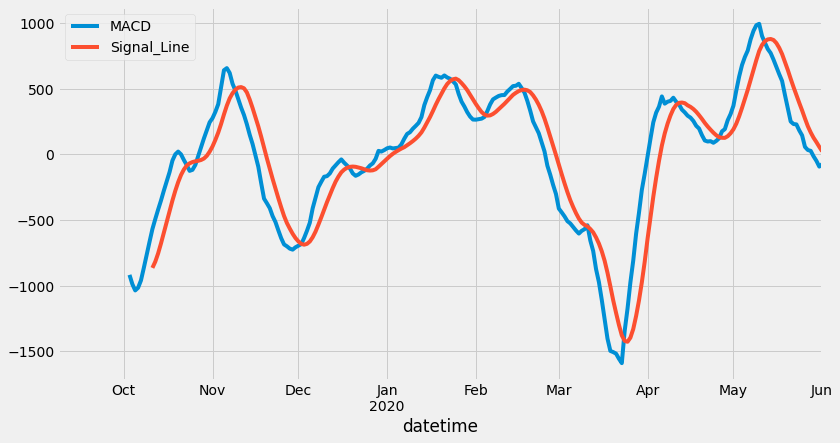

In [58]:
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize=(12.2, 6.4))

<AxesSubplot:xlabel='datetime'>

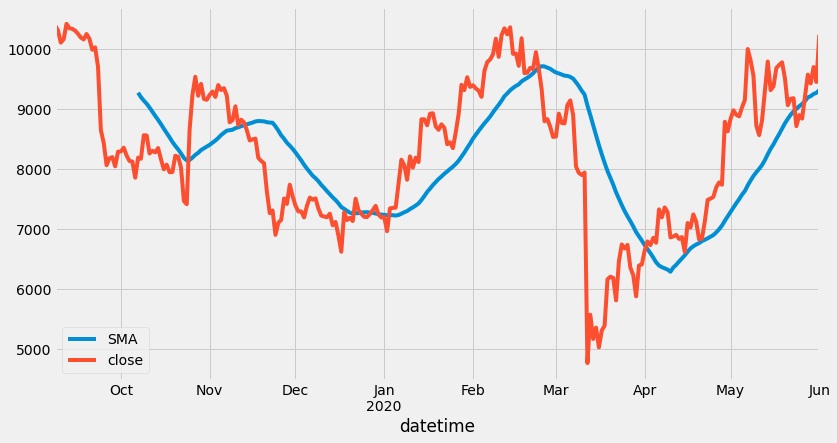

In [61]:
column_list = ['SMA', 'close']
df[column_list].plot(figsize=(12.2, 6.4))

<AxesSubplot:xlabel='datetime'>

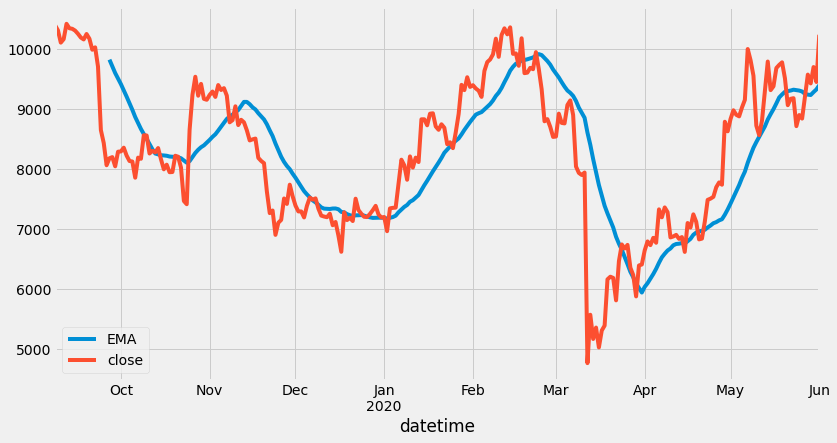

In [63]:
column_list = ['EMA', 'close']
df[column_list].plot(figsize=(12.2, 6.4))

<AxesSubplot:xlabel='datetime'>

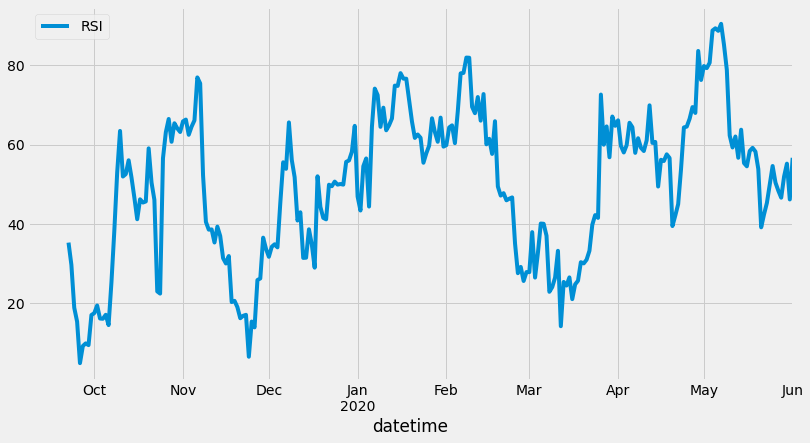

In [64]:
column_list = ['RSI']
df[column_list].plot(figsize=(12.2, 6.4))